# Hipótesis 3:

### Hipótesis 3: "En un núcleo familiar compuesto por más miembros es más probable que se invierta en energía renovable"

#### **Preparación del entorno**

In [68]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.cm as cm  
import numpy as np
from sklearn import preprocessing 
import os 
import seaborn as sns
from sklearn import metrics
from sklearn.decomposition import PCA


GOLD_DATA_PATH = os.path.join("..", "..", "data/gold/")

In [69]:
h3_df = pd.read_csv(GOLD_DATA_PATH + "data_card_3_df.csv", sep = ";", encoding = "latin")
h3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Provincias                              47 non-null     object 
 1   Índice dispositivos energía renovable   47 non-null     float64
 2   Familia monoparental con 0 hijos        47 non-null     float64
 3   Familia monoparental con 1 hijo         47 non-null     float64
 4   Familia monoparental con 2 hijos o más  47 non-null     float64
 5   Pareja casada con 0 hijos               47 non-null     float64
 6   Pareja casada con 1 hijo                47 non-null     float64
 7   Pareja casada con 2 hijos o más         47 non-null     float64
 8   Pareja no casada con 0 hijos            47 non-null     float64
 9   Pareja no casada con 1 hijo             47 non-null     float64
 10  Pareja no casada con 2 hijos o más      47 non-null     float64


#### **EDA**

In [70]:
h3_df.head()

,Provincias,Índice dispositivos energía renovable,Familia monoparental con 0 hijos,Familia monoparental con 1 hijo,Familia monoparental con 2 hijos o más,Pareja casada con 0 hijos,Pareja casada con 1 hijo,Pareja casada con 2 hijos o más,Pareja no casada con 0 hijos,Pareja no casada con 1 hijo,Pareja no casada con 2 hijos o más
0,Albacete,0.043141,0.033132,0.072565,0.044648,0.304961,0.176333,0.256043,0.051729,0.028501,0.032087
1,Alicante/Alacant,0.040361,0.041038,0.094143,0.045081,0.329020,0.160075,0.207443,0.065322,0.037659,0.020219
2,Almería,0.067138,0.030276,0.090071,0.042470,0.290029,0.161023,0.254404,0.059751,0.040286,0.031691
3,Araba/Álava,0.104454,0.033775,0.097398,0.045232,0.328722,0.157060,0.201585,0.072500,0.037726,0.026002
4,Asturias,0.050314,0.056932,0.115216,0.035539,0.365556,0.187972,0.132908,0.066571,0.023420,0.015886


- **Correlación entre variables**

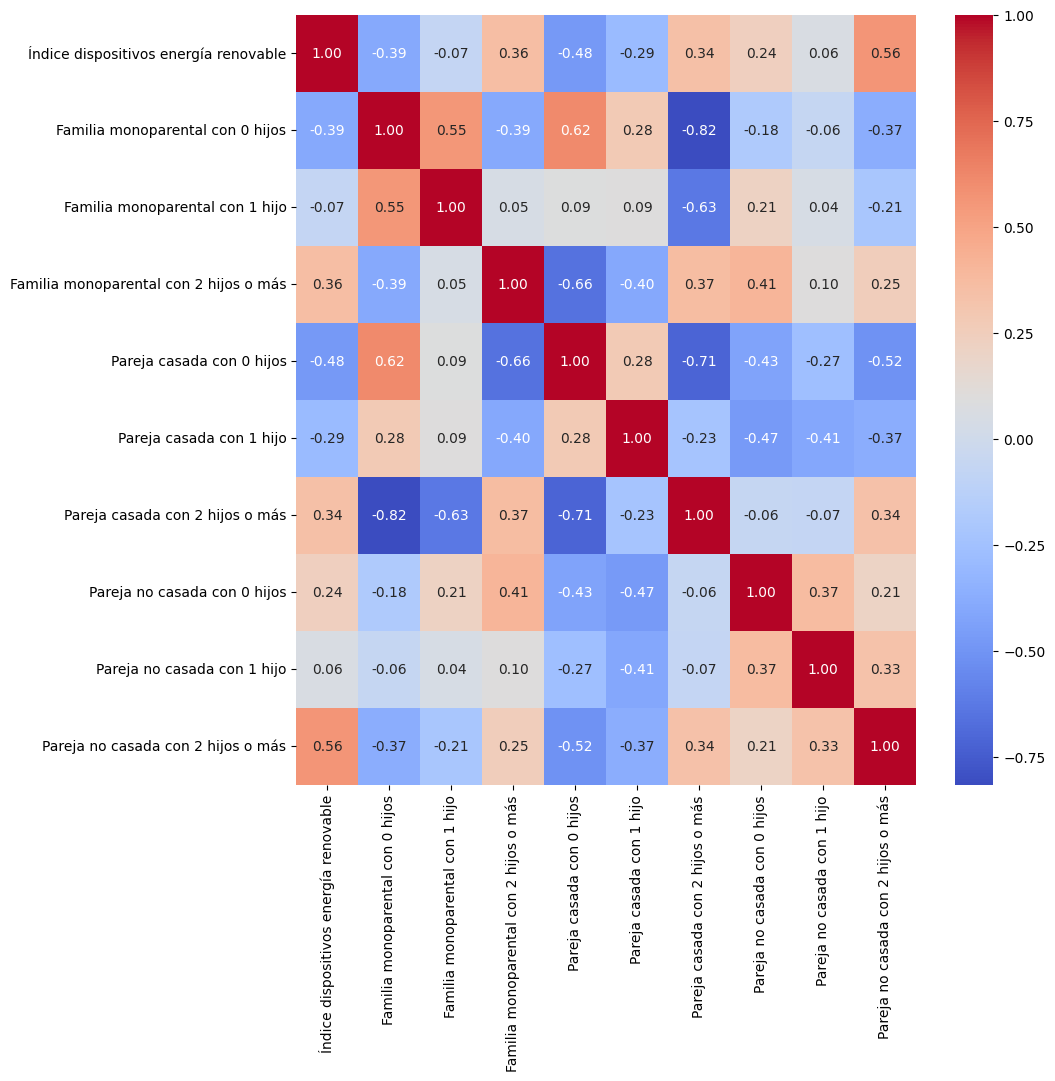

In [71]:
# Correlation matrix
corr = h3_df.iloc[:, 1:].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

- **Pairplot para visualizar la distribución de valores en variables.**

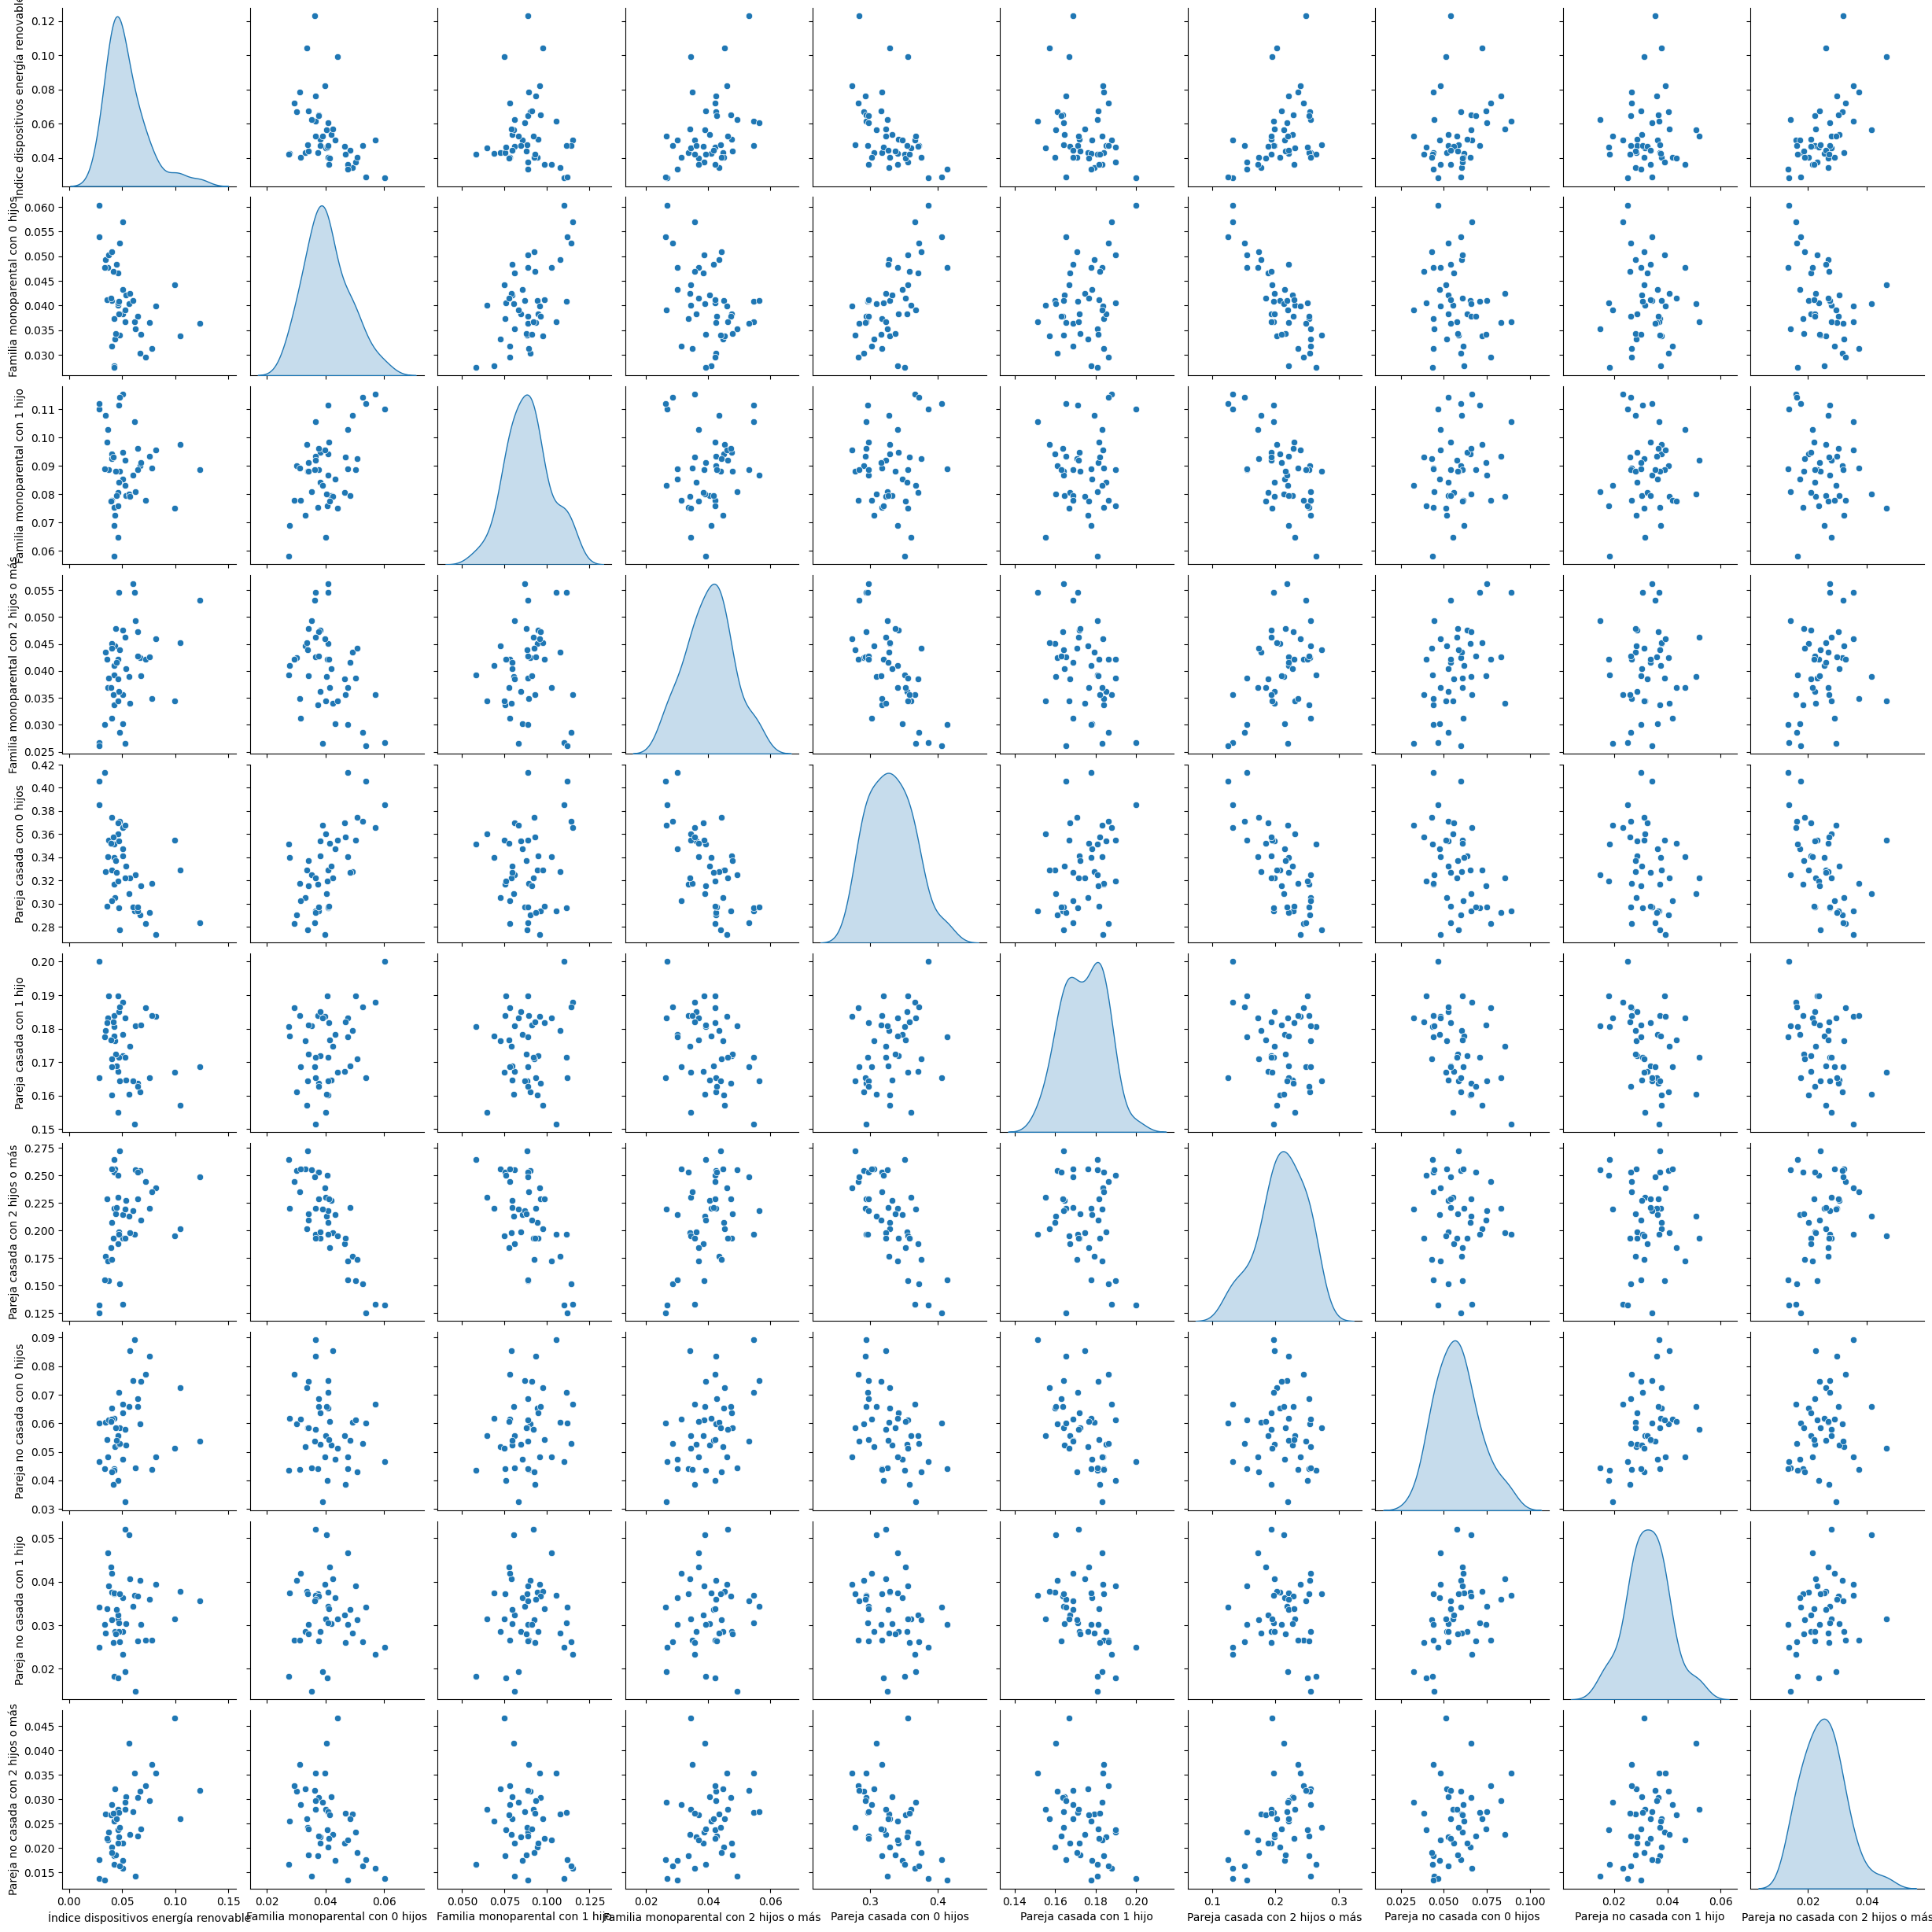

In [72]:

sns.pairplot(h3_df.iloc[:, 1:], diag_kind='kde')

### ***K-Means***

- Selección de variables

In [73]:
# Selección de características para el clustering
features = h3_df.iloc[:, 1:]  # Todas las columnas excepto 'Provincias'

- En el pairplot se observa que las variables siguen una distribución normal, por lo que, antes de hacer el model k-means, se normalizan las variables con StandardScaler.

In [74]:
# Escalado de datos para normalizar las variables
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

- **Prueba de K-Means**

In [75]:
# Aplicar el algoritmo K-Means
n_clusters = 3  # Número de clusters (puedes ajustar este valor)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(features_scaled)

KMeans(n_clusters=3, random_state=42)

- Se crea columna 'Cluster' para guardarle a cada provincia el cluster al que pertenece.

In [76]:
# Añadir los clusters al DataFrame original
h3_df["Cluster"] = kmeans.labels_

In [77]:
pca = PCA(n_components=2) # 2 componentes principales
features_2d = pca.fit_transform(features_scaled)

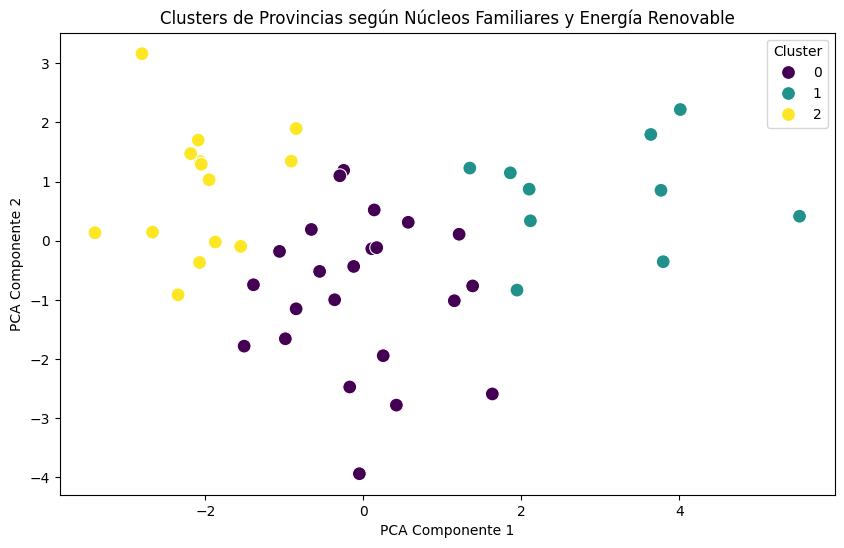

In [78]:
# Crear un scatter plot de los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=features_2d[:, 0],
    y=features_2d[:, 1],
    hue=h3_df["Cluster"],
    palette="viridis",
    s=100
)
plt.title("Clusters de Provincias según Núcleos Familiares y Energía Renovable")
plt.xlabel("PCA Componente 1")
plt.ylabel("PCA Componente 2")
plt.legend(title="Cluster")
plt.show()

- Visualización total de clusters por provincia.

In [53]:
# Opcional: Ver las provincias en cada cluster
for cluster_id in range(n_clusters):
    print(f"Provincias en el Cluster {cluster_id}:")
    print(h3_df[h3_df["Cluster"] == cluster_id]["Provincias"].values)
    print()

Provincias en el Cluster 0:
['Albacete' 'Alicante/Alacant' 'Badajoz' 'Bizkaia' 'Burgos'
 'Castellón/Castelló' 'Ciudad Real' 'Cuenca' 'Cáceres' 'Córdoba'
 'Gipuzkoa' 'Huelva' 'Huesca' 'Jaén' 'Palencia' 'Rioja, La' 'Segovia'
 'Soria' 'Teruel' 'Toledo' 'Valencia/València' 'Valladolid' 'Zaragoza']

Provincias en el Cluster 1:
['Asturias' 'Cantabria' 'Coruña, A' 'León' 'Lugo' 'Ourense' 'Pontevedra'
 'Salamanca' 'Zamora' 'Ávila']

Provincias en el Cluster 2:
['Almería' 'Araba/Álava' 'Barcelona' 'Cádiz' 'Girona' 'Granada'
 'Guadalajara' 'Lleida' 'Madrid' 'Murcia' 'Málaga' 'Navarra' 'Sevilla'
 'Tarragona']



- Se aplica Elbow method (método del codo) para ver si hay un número de clusters más óptimo.

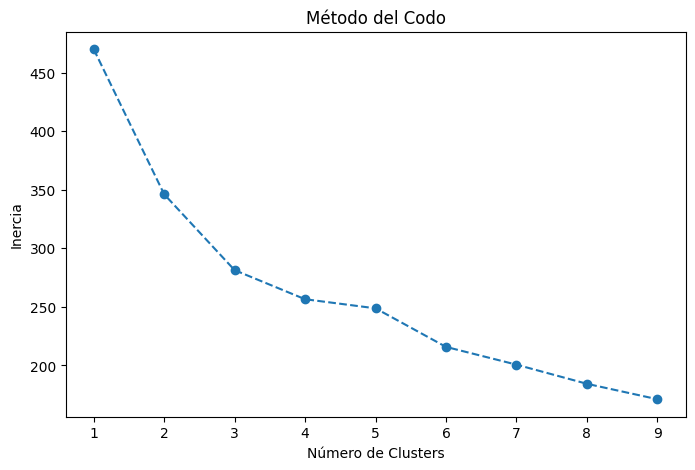

In [ ]:
# Método del codo para elegir el número de clusters
inertia = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled) 
    inertia.append(kmeans.inertia_) # Suma de las distancias al cuadrado de las muestras al centro del cluster más cercano

# Visualizar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title("Método del Codo")
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")
plt.show()


In [55]:
# Análisis descriptivo por cluster
for cluster_id in range(n_clusters):
    print(f"Estadísticas descriptivas para el Cluster {cluster_id}:")
    cluster_data = h3_df[h3_df["Cluster"] == cluster_id].iloc[:, 1:-1]  # Excluir 'Provincias' y 'Cluster'
    print(cluster_data.describe())
    print("\n")


Estadísticas descriptivas para el Cluster 0:
       Índice dispositivos energía renovable  \
count                              23.000000   
mean                                0.051025   
std                                 0.014360   
min                                 0.036177   
25%                                 0.042666   
50%                                 0.046104   
75%                                 0.053185   
max                                 0.099219   

       Familia monoparental con 0 hijos  Familia monoparental con 1 hijo  \
count                         23.000000                        23.000000   
mean                           0.038231                         0.080632   
std                            0.005597                         0.009619   
min                            0.027473                         0.058136   
25%                            0.034275                         0.075667   
50%                            0.039040                         0.

#### **Análisis resultados por boxplot**

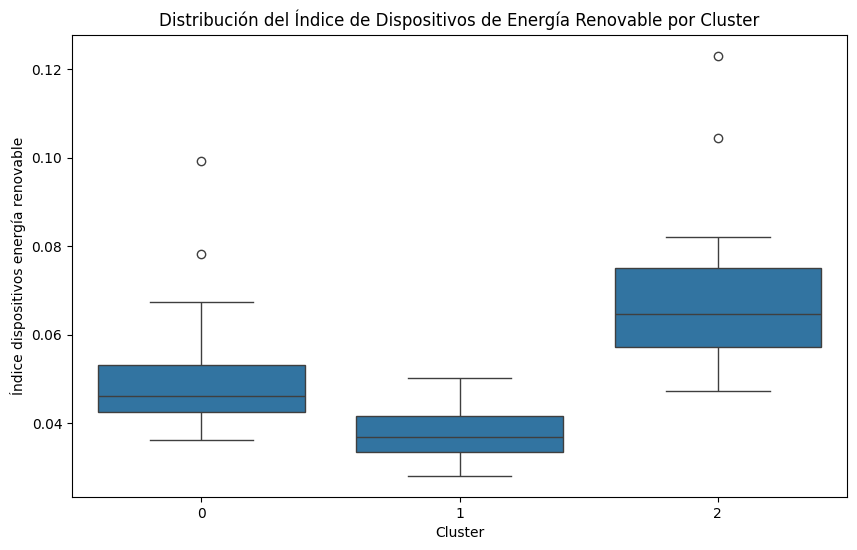

In [56]:
# Gráfico de barras comparando el índice de energía renovable entre clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x="Cluster", y="Índice dispositivos energía renovable", data=h3_df)
plt.title("Distribución del Índice de Dispositivos de Energía Renovable por Cluster")
plt.show()


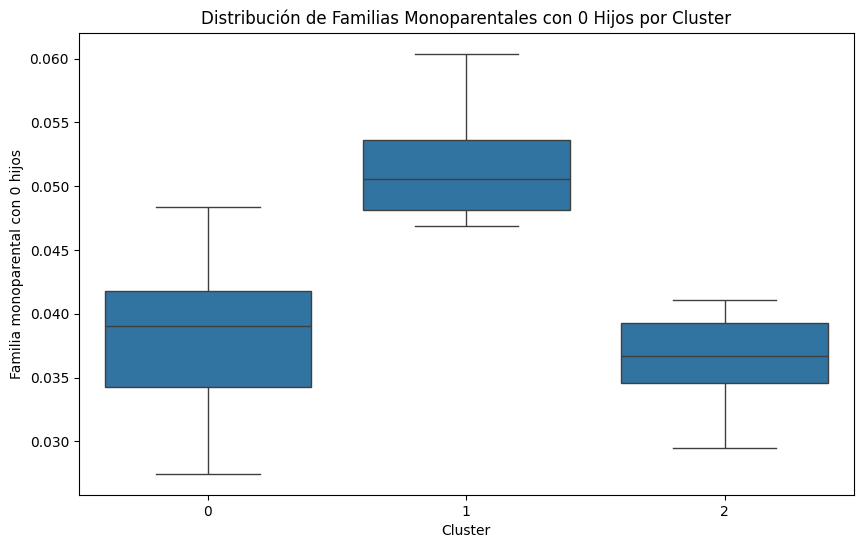

In [57]:
# Gráfico de barras comparando las proporciones de familias en diferentes tipos de núcleos familiares
plt.figure(figsize=(10, 6))
sns.boxplot(x="Cluster", y="Familia monoparental con 0 hijos", data=h3_df)
plt.title("Distribución de Familias Monoparentales con 0 Hijos por Cluster")
plt.show()


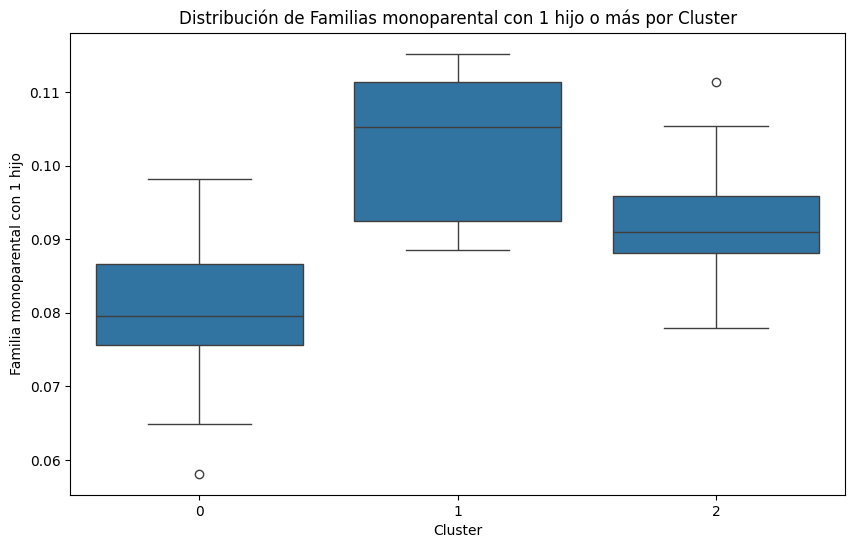

In [58]:
# Gráfico de barras comparando las proporciones de familias en diferentes tipos de núcleos familiares
plt.figure(figsize=(10, 6))
sns.boxplot(x="Cluster", y="Familia monoparental con 1 hijo", data=h3_df)
plt.title("Distribución de Familias monoparental con 1 hijo o más por Cluster")
plt.show()

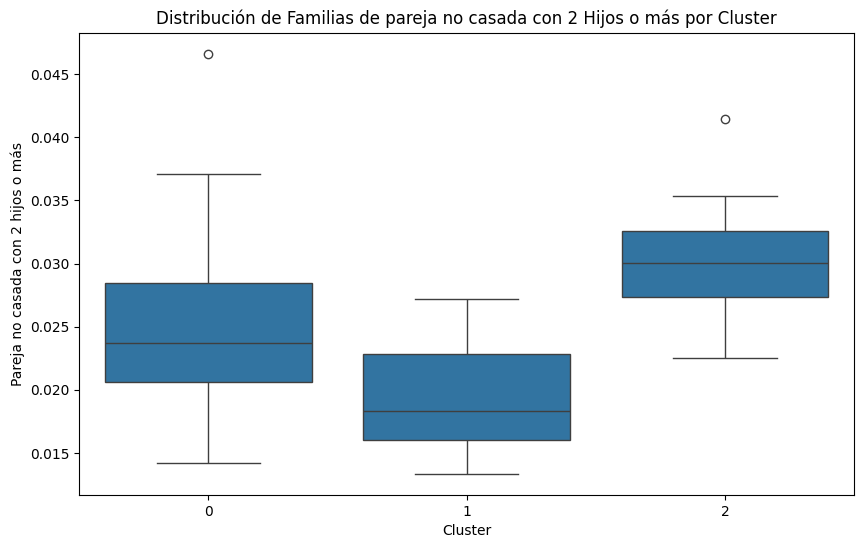

In [59]:
# Gráfico de barras comparando las proporciones de familias en diferentes tipos de núcleos familiares
plt.figure(figsize=(10, 6))
sns.boxplot(x="Cluster", y="Pareja no casada con 2 hijos o más", data=h3_df)
plt.title("Distribución de Familias de pareja no casada con 2 Hijos o más por Cluster")
plt.show()


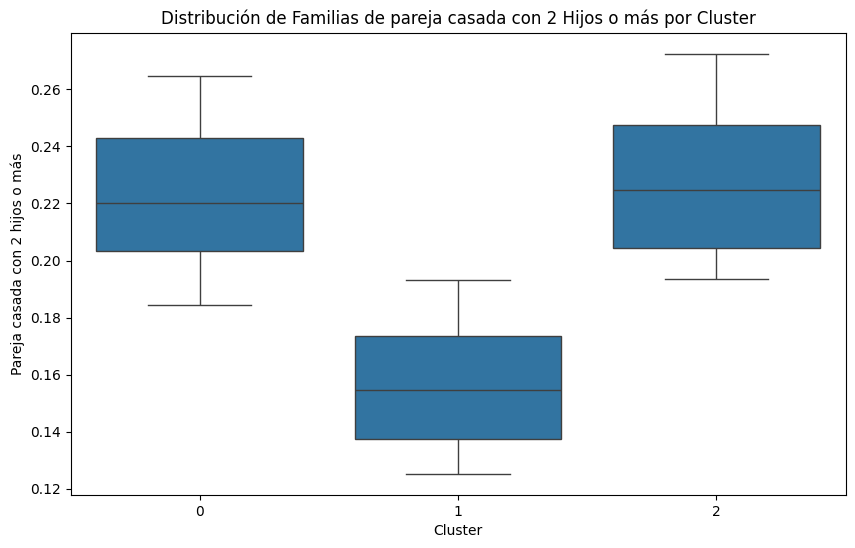

In [60]:
# Gráfico de barras comparando las proporciones de familias en diferentes tipos de núcleos familiares
plt.figure(figsize=(10, 6))
sns.boxplot(x="Cluster", y="Pareja casada con 2 hijos o más", data=h3_df)
plt.title("Distribución de Familias de pareja casada con 2 Hijos o más por Cluster")
plt.show()


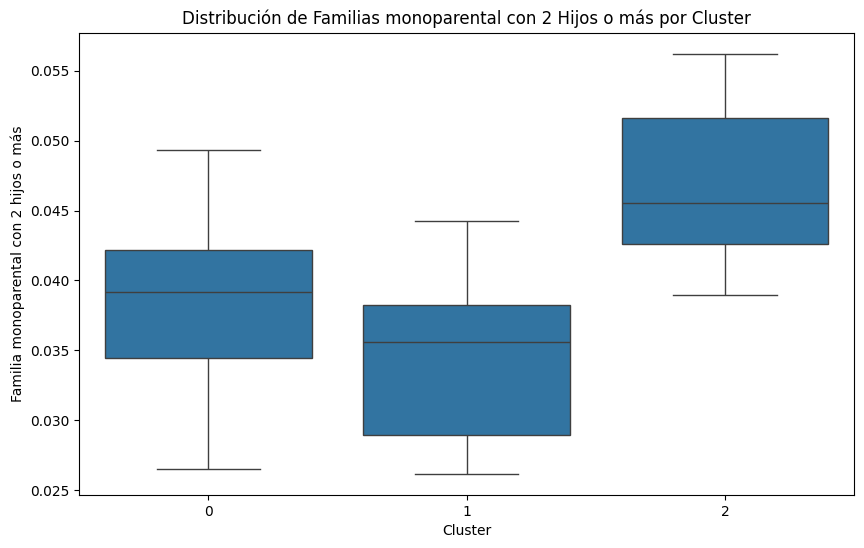

In [61]:
# Gráfico de barras comparando las proporciones de familias en diferentes tipos de núcleos familiares
plt.figure(figsize=(10, 6))
sns.boxplot(x="Cluster", y="Familia monoparental con 2 hijos o más", data=h3_df)
plt.title("Distribución de Familias monoparental con 2 Hijos o más por Cluster")
plt.show()
